# Import required packages

In [3]:
import pandas as pd
import numpy as np
import csv

from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics.pairwise import cosine_similarity

from textblob import TextBlob
from gensim.models import Word2Vec
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
import string
from nltk.corpus import wordnet
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#Read CSV file

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# importing required modules
from zipfile import ZipFile
  
# specifying the zip file name
file_name = "/content/drive/MyDrive/Colab Notebooks/BeerDataScienceProject.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

File Name                                             Modified             Size
BeerDataScienceProject.csv                     2019-10-18 14:27:06    414885425
Extracting all the files now...
Done!


In [4]:
csv_file_path = r'/content/BeerDataScienceProject.csv'


In [8]:
beer_data_df = pd.read_csv(csv_file_path,encoding='latin-1')
#,encoding='latin-1'
# Drop Null Values from all columns
beer_data_df = beer_data_df.dropna()

In [9]:
beer_data_df.shape

(508358, 13)

# 1.	Rank top 3 Breweries which produce the strongest beers?

In [10]:
beer_id_df = beer_data_df.groupby(['beer_brewerId'])['beer_ABV'].mean()
beer_id_df = pd.DataFrame(beer_id_df.reset_index())
beer_id_df.columns = ['beer_brewerId','beer_abv_mean']
beer_id_df.sort_values(by=['beer_abv_mean'], ascending=False).head(3)

,beer_brewerId,beer_abv_mean
699,6513,19.228824
165,736,13.750000
1466,24215,12.466667


# 2.	Which year did beers enjoy the highest ratings? 

In [11]:
beer_data_df['review_year'] = pd.DatetimeIndex(pd.to_datetime(beer_data_df['review_time'], unit='s')).year
beer_data_df['avg review'] = beer_data_df[['review_appearance', 'review_palette','review_taste','review_aroma','review_overall']].mean(axis=1)
highest_ratings_by_year_df = beer_data_df.groupby(['review_year'])['avg review'].mean()
highest_ratings_by_year_df = pd.DataFrame(highest_ratings_by_year_df.reset_index()).sort_values(by=['avg review'], ascending=False)
highest_ratings_by_year_df.head(1)['review_year'].to_string(index=False)

' 2000'

# 3.	Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?

In [12]:
rating_corr = beer_data_df.corr()['review_overall'][['review_palette','review_taste','review_aroma','review_appearance']]
rating_corr = pd.DataFrame(rating_corr.reset_index())
rating_corr
print(rating_corr.sort_values(by=['review_overall'], ascending=False))
rating_corr.sort_values(by=['review_overall'], ascending=False).head(1)['index'].to_string(index=False)


               index  review_overall
2       review_aroma        0.780310
1       review_taste        0.689276
0     review_palette        0.598048
3  review_appearance        0.483091


' review_aroma'

[0.00880608 0.05623416 0.92500412 0.00995564]


<BarContainer object of 4 artists>

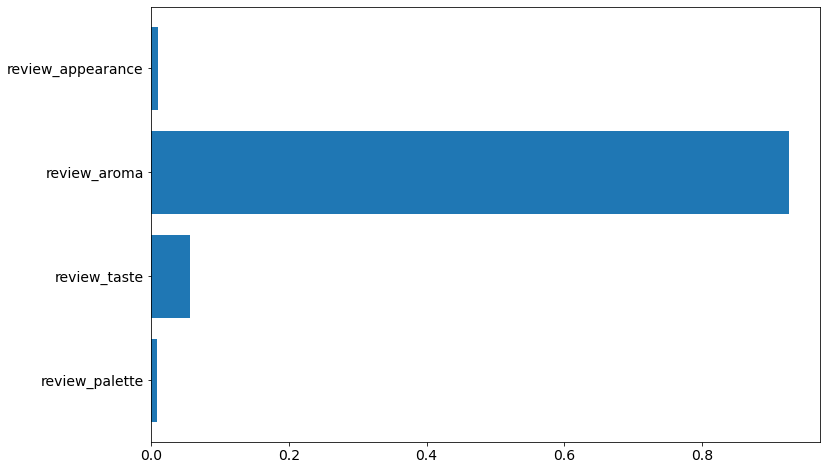

In [13]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

X = beer_data_df[['review_palette','review_taste','review_aroma','review_appearance']]
y = beer_data_df['review_overall'].values

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X, y)

print(rf.feature_importances_)

plt.barh(['review_palette','review_taste','review_aroma','review_appearance'], rf.feature_importances_)


# 4.	If you were to recommend 3 beers to your friends based on this data which ones will you recommend?

In [14]:
rec_beer_id_df = beer_data_df.groupby(['beer_name'])['review_overall'].mean()
rec_beer_id_df = pd.DataFrame(rec_beer_id_df.reset_index())
rec_beer_id_df.columns = ['beer_name','review_overall_mean']
rec_beer_id_df = rec_beer_id_df.sort_values(by=['review_overall_mean'], ascending=False).head(3)['beer_name']#.to_string(index=False)
rec_beer_id_df

10582    Rural People's Common Lager
5989                          Hop It
2428          Bubba Imperial Pilsner
Name: beer_name, dtype: object

# 5.	Which Beer style seems to be the favorite based on reviews written by users? 

In [15]:


def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def cleansingText(reviewTxt):
    sentence = reviewTxt.lower()
    return sentence
#     lemmatizer = WordNetLemmatizer()
#     cleantxt = (" ".join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(sentence) if (w not in string.punctuation) and (w not in stopwords.words())]))
#     return cleantxt


In [16]:
print(beer_data_df.shape)

#Considering review text where overall rating was above 4 stars
four_star_rated_beer_df = beer_data_df[beer_data_df['review_overall'] >= 4]
print(four_star_rated_beer_df.shape)

#Clean Text
four_star_rated_beer_df['clean_review_text'] = four_star_rated_beer_df['review_text'].apply(lambda x: cleansingText(x))



(508358, 15)
(327660, 15)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:

#Computing polarity score using TextBlob
four_star_rated_beer_df['polarity_score'] = four_star_rated_beer_df['clean_review_text'].apply(lambda x: TextBlob(x).sentiment[0])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
#Compute average polarity by each beer_style
beer_style_rec = four_star_rated_beer_df.groupby(['beer_style'])['polarity_score'].mean()
beer_style_rec = pd.DataFrame(beer_style_rec.reset_index())
beer_style_rec.columns = ['beer_style','polarity_score']
beer_style_rec.sort_values(by=['polarity_score'], ascending=False).head(3)

,beer_style,polarity_score
99,Vienna Lager,0.262385
38,Dortmunder / Export Lager,0.259825
36,Czech Pilsener,0.241622


# 6.	How does written review compare to overall review score for the beer styles?

In [19]:
reviews_all = four_star_rated_beer_df.groupby(['beer_style'])['polarity_score','review_overall'].mean()
review_score_beerstyle = pd.DataFrame(reviews_all.reset_index()).sort_values(['polarity_score','review_overall'], ascending=[False,False])
review_score_beerstyle.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


,beer_style,polarity_score,review_overall
99,Vienna Lager,0.262385,4.277483
38,Dortmunder / Export Lager,0.259825,4.358124
36,Czech Pilsener,0.241622,4.276327
82,Märzen / Oktoberfest,0.237593,4.218854
85,Pumpkin Ale,0.234756,4.205292


# 7.	How do find similar beer drinkers by using written reviews only?   

In [30]:
def cleanseText(text):
    ''' Pre process and convert texts to a list of words '''
    import regex as re
    from nltk.corpus import stopwords
    stop_words = stopwords.words('english')
    text = str(text)
    text = text.lower()
    text = text.strip()
    #text = text.strip('no')

    tokens_without_sw = [word for word in text.split() if not word in stop_words]
    text = (" ").join(tokens_without_sw)
    #text = re.sub(r"\d+", "", text)
    #text = re.sub(r"[,!.\/+-=]", "", text)
    #text = re.sub(r"\b\w\b", "", text)
    text = re.sub(r"\s+", " ", text)
    #text = text.split()
    
    return text.strip()

In [21]:
#Considering review text where the reviewer has atleast reviewed atleast 200 beers
print(beer_data_df.shape)
subbeer_data_df = beer_data_df[beer_data_df.groupby('review_profileName').review_profileName.transform('count')>=500].copy() 
print(subbeer_data_df.shape)

#Merge text reviews by each reviewer
subbeer_data_df = subbeer_data_df.groupby(['review_profileName'])['review_text'].apply(','.join).reset_index()
print(subbeer_data_df.shape)



(508358, 15)
(60081, 15)
(86, 2)


In [22]:
subbeer_data_df2 = subbeer_data_df.copy()

#Perform cross join on the same df so that each review text can be compared by every other
#new_df = subbeer_data_df.merge(subbeer_data_df, how="left")


subbeer_data_df2['key'] = 1
subbeer_data_df['key'] = 1
  
# to obtain the cross join we will merge on 
# the key and drop it.
new_df = pd.merge(subbeer_data_df2, subbeer_data_df, on ='key').drop("key", 1)
  
print(new_df.shape)
print(new_df.columns)

(7396, 4)
Index(['review_profileName_x', 'review_text_x', 'review_profileName_y',
       'review_text_y'],
      dtype='object')


In [33]:
cleansingText

new_df['review_text_x'] = new_df['review_text_x'].apply(lambda x : cleansingText(x))
new_df['review_text_y'] = new_df['review_text_y'].apply(lambda x : cleansingText(x))

In [34]:
new_df.head()

,review_profileName_x,review_text_x,review_profileName_y,review_text_y
0,BEERchitect,well balanced between caramel maltiness and ci...,BEERchitect,well balanced between caramel maltiness and ci...
1,BEERchitect,well balanced between caramel maltiness and ci...,Beerandraiderfan,"brown in color, somewhere between a porter and..."
2,BEERchitect,well balanced between caramel maltiness and ci...,Bighuge,pours with viscosity noticeable. appearance is...
3,BEERchitect,well balanced between caramel maltiness and ci...,Billolick,"growler filled somewhere i cant remember, on l..."
4,BEERchitect,well balanced between caramel maltiness and ci...,Bitterbill,12oz can received today by the great trader kn...


In [36]:
!pip install strsimpy

     |████████████████████████████████| 45 kB 3.9 MB/s 


In [ ]:
new_df['review_profileName_x'] = new_df.review_profileName_x.astype(str)
new_df['review_text_x'] = new_df.review_text_x.astype(str)
new_df['review_profileName_y'] = new_df.review_profileName_y.astype(str)
new_df['review_text_y'] = new_df.review_text_y.astype(str)

In [49]:
from strsimpy.cosine import Cosine
cosine = Cosine(2)

print('Getting cosine profile . . .')
new_df["p0"] = new_df['review_text_x'].apply(lambda s: cosine.get_profile(s))
new_df["p1"] = new_df['review_text_y'].apply(lambda s: cosine.get_profile(s))

Getting cosine profile . . .


In [59]:
print('Computing cosine scores . . .')
new_df["cosine_similarity_scores"] = new_df.apply(lambda s: cosine.similarity_profiles(s['p0'],s['p1']),axis=1)

Computing cosine scores . . .


In [60]:
print('Converting cosine scores to percentage. . .')
new_df["cosine_similarity_scores"] = new_df["cosine_similarity_scores"]*100
new_df["cosine_similarity_scores"] = new_df["cosine_similarity_scores"].astype(int)
print('Done!')

Converting cosine scores to percentage. . .
Done!


In [62]:
print(new_df.shape)
new_df = new_df[new_df["review_profileName_x"] != new_df["review_profileName_y"] ]
print(new_df.shape)


(7396, 7)
(7310, 7)


In [67]:
new_df.head()

,review_profileName_x,review_text_x,review_profileName_y,review_text_y,p0,p1,cosine_similarity_scores
1,BEERchitect,well balanced between caramel maltiness and ci...,Beerandraiderfan,"brown in color, somewhere between a porter and...","{'we': 2758, 'el': 3571, 'll': 2998, 'l ': 326...","{'br': 493, 'ro': 1678, 'ow': 840, 'wn': 328, ...",97
2,BEERchitect,well balanced between caramel maltiness and ci...,Bighuge,pours with viscosity noticeable. appearance is...,"{'we': 2758, 'el': 3571, 'll': 2998, 'l ': 326...","{'po': 381, 'ou': 2342, 'ur': 756, 'rs': 658, ...",97
3,BEERchitect,well balanced between caramel maltiness and ci...,Billolick,"growler filled somewhere i cant remember, on l...","{'we': 2758, 'el': 3571, 'll': 2998, 'l ': 326...","{'gr': 387, 'ro': 1125, 'ow': 750, 'wl': 94, '...",96
4,BEERchitect,well balanced between caramel maltiness and ci...,Bitterbill,12oz can received today by the great trader kn...,"{'we': 2758, 'el': 3571, 'll': 2998, 'l ': 326...","{'12': 135, '2o': 137, 'oz': 182, 'z ': 177, '...",96
5,BEERchitect,well balanced between caramel maltiness and ci...,BuckeyeNation,dark honey with the slightest suggestion of or...,"{'we': 2758, 'el': 3571, 'll': 2998, 'l ': 326...","{'da': 2053, 'ar': 13417, 'rk': 1433, 'k ': 38...",97
